## Import Libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

## Read data from PostgreSQL using SQLalchemy

In [127]:
## here goes the code instead of pd.read_csv

dataset11 = pd.read_csv('AQI_Data_2015.csv')
dataset11.head()

,Date,AQI_CO,AQI_NO2,AQI_O3,AQI_PM_2_5,AQI_PM_10,AQI_Max
0,1/1/15,7,37,26,55,0,55
1,1/2/15,8,42,20,73,0,73
2,1/3/15,10,45,17,84,0,84
3,1/4/15,10,40,19,86,0,86
4,1/5/15,9,42,12,69,0,69


## Descriptive Statistics

In [128]:
dataset11.describe()

,AQI_CO,AQI_NO2,AQI_O3,AQI_PM_2_5,AQI_PM_10,AQI_Max
count,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000
mean,5.754098,22.174863,26.26776,29.248634,1.371585,38.226776
std,2.605510,13.840858,9.22352,20.602592,5.238285,15.072808
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,21.00000,15.000000,0.000000,28.000000
50%,5.000000,20.500000,26.50000,26.000000,0.000000,35.000000
75%,8.000000,33.000000,32.00000,42.000000,0.000000,44.000000
max,15.000000,68.000000,90.00000,100.000000,41.000000,100.000000


## Checking for linearity

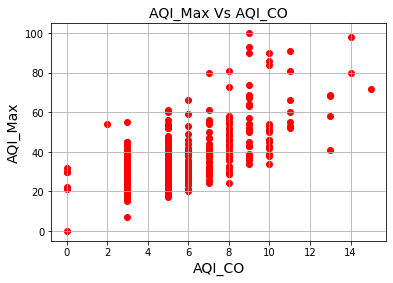

In [129]:
plt.scatter(dataset11['AQI_CO'], dataset11['AQI_Max'], color='red')
plt.title('AQI_Max Vs AQI_CO', fontsize=14)
plt.xlabel('AQI_CO', fontsize=14)
plt.ylabel('AQI_Max', fontsize=14)
plt.grid(True)
plt.show()

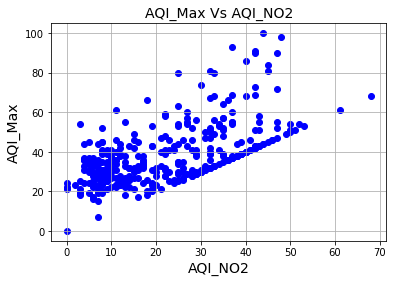

In [130]:
plt.scatter(dataset11['AQI_NO2'], dataset11['AQI_Max'], color='blue')
plt.title('AQI_Max Vs AQI_NO2', fontsize=14)
plt.xlabel('AQI_NO2', fontsize=14)
plt.ylabel('AQI_Max', fontsize=14)
plt.grid(True)
plt.show()

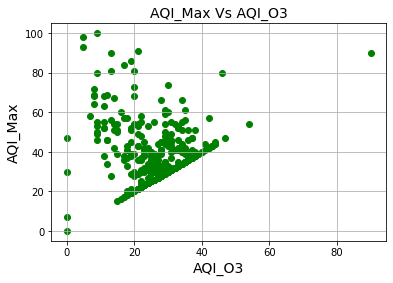

In [131]:
plt.scatter(dataset11['AQI_O3'], dataset11['AQI_Max'], color='green')
plt.title('AQI_Max Vs AQI_O3', fontsize=14)
plt.xlabel('AQI_O3', fontsize=14)
plt.ylabel('AQI_Max', fontsize=14)
plt.grid(True)
plt.show()

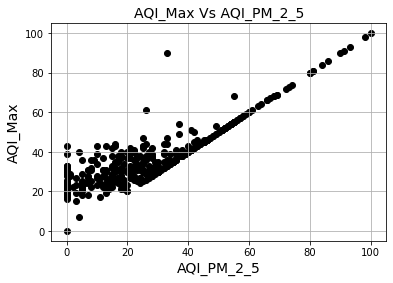

In [132]:
plt.scatter(dataset11['AQI_PM_2_5'], dataset11['AQI_Max'], color='black')
plt.title('AQI_Max Vs AQI_PM_2_5', fontsize=14)
plt.xlabel('AQI_PM_2_5', fontsize=14)
plt.ylabel('AQI_Max', fontsize=14)
plt.grid(True)
plt.show()

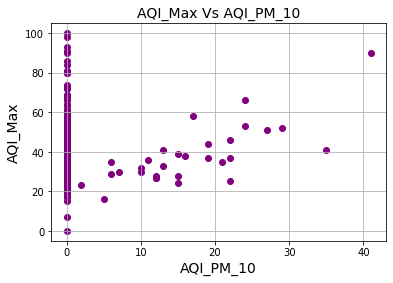

In [133]:

plt.scatter(dataset11['AQI_PM_10'], dataset11['AQI_Max'], color='purple')
plt.title('AQI_Max Vs AQI_PM_10', fontsize=14)
plt.xlabel('AQI_PM_10', fontsize=14)
plt.ylabel('AQI_Max', fontsize=14)
plt.grid(True)
plt.show()

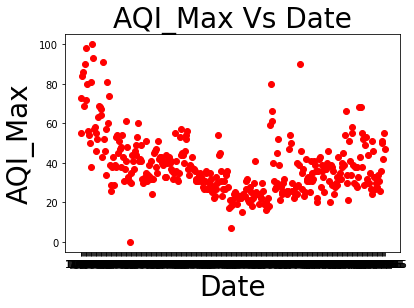

In [134]:
plt.scatter(dataset11['Date'], dataset11['AQI_Max'], color='red')
plt.title('AQI_Max Vs Date', fontsize=28)
plt.xlabel('Date', fontsize=28)
plt.ylabel('AQI_Max', fontsize=28)
#plt.grid(True)
plt.show()

In [52]:
##  indeed a linear relationship exists between the AQI_Max and the other features


## Preparing the Data

In [145]:
X = dataset11[['AQI_CO', 'AQI_NO2', 'AQI_O3',
       'AQI_PM_2_5', 'AQI_PM_10']]
y = dataset11['AQI_Max']

## Divide our data into training and test sets

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Algorithm

In [147]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## See what coefficients our regression model has chosen

## Interpret coefficients

## Making Predictions

In [148]:
# Make pre-dictions on the test data

y_pred = regressor.predict(X_test)

In [149]:
# Compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)


##run this prediction again for my testing data to predict future years

,Actual,Predicted
106,43,38.205598
259,40,27.531317
45,45,50.729184
26,43,49.648134
78,51,55.399189
347,35,29.957346
90,38,37.867035
311,35,43.056179
239,21,30.641620
6,72,65.918005


## Evaluating the Algorithm

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.897100720997784
Mean Squared Error: 60.98154338293514
Root Mean Squared Error: 7.809068022685879


In [151]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                AQI_Max   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     350.7
Date:                Sun, 25 Apr 2021   Prob (F-statistic):          6.00e-136
Time:                        15:21:18   Log-Likelihood:                -1187.8
No. Observations:                 366   AIC:                             2388.
Df Residuals:                     360   BIC:                             2411.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5210      1.464      5.819      0.0

In [62]:
## create formula for each escenario and plot the line

In [63]:
## predict five years in the future

##initial date .....create days....mm/dd/yy >>create an array>>similar to list>> day 1 until day 30....find the>>column 1

## Column 2: AQI_max = intercept + CO(time)+NO2(time)+Ozone(time)....append to the list every AQI max I predict
## pollutants are replaced by the intercepts....find how to replace time by days...

##unix time stamp: starting time 01/01/2015>>>in the future..how many days after this date...x variable....

## slope...find equation......

## new list: create df.... x=date y=max AQI 

## final date 

In [64]:
## Equation: y = a + max(b, c, d) * x




In [ ]:
# plt.scatter(x1,y)
 
# y = max(AQI_CO,AQI_NO2, AQI_O3,AQI_PM_2_5, AQI_PM_10)*(coef(max(AQI_CO,AQI_NO2, AQI_O3,AQI_PM_2_5, AQI_PM_10) + 8.52
 
# fig = plt.plot(x1,yhat, lw=4, c=’orange’, label = ‘regression line’)
 
# plt.xlabel(‘SAT’, fontsize = 20)
 
# plt.ylabel(‘GPA’, fontsize = 20)
 
# plt.show()

## https://machinelearningmastery.com/curve-fitting-with-python/
## Curve Fitting

In [158]:
# fit a line to the AQI_Max
from numpy import sin
from numpy import sqrt
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [159]:
# define the true objective function
def objective(x, a, b, c, d):
	return a + sin(max(b, c, d))* x

In [161]:
# load the dataset
dataset11.head()

,Date_Daily,Date_Days,New_ID12,New_ID1,New_ID,index,Date,AQI_CO,AQI_NO2,AQI_O3,AQI_PM_2_5,AQI_PM_10,AQI_Max
0,0,0,0,366,880,0,1/1/15,7,37,26,55,0,55
1,1,1,1,367,881,1,1/2/15,8,42,20,73,0,73
2,2,2,2,368,882,2,1/3/15,10,45,17,84,0,84
3,3,3,3,369,883,3,1/4/15,10,40,19,86,0,86
4,4,4,4,370,884,4,1/5/15,9,42,12,69,0,69


In [ ]:
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
#dataframe = read_csv(url, header=None)
#data = dataframe.values

In [115]:
dataset.set_index('Date')

,AQI_CO,AQI_NO2,AQI_O3,AQI_PM_2_5,AQI_PM_10,AQI_Max
Date,,,,,,
1/1/15,7,37,26,55,0,55
1/2/15,8,42,20,73,0,73
1/3/15,10,45,17,84,0,84
1/4/15,10,40,19,86,0,86
1/5/15,9,42,12,69,0,69
...,...,...,...,...,...,...
12/27/15,9,32,15,50,0,50
12/28/15,10,35,15,51,0,51
12/29/15,10,32,14,42,0,42


In [124]:
dataset.insert(0, 'Date_Daily', range(0, 0 + len(dataset)))

ValueError: cannot insert Date_Daily, already exists

In [123]:
# dataset = dataset.reset_index()
# dataset.columns[0] = 'Date_N'
# dataset['Date_N'] = dataset.index + 366

dataset

# df.insert(0, 'New_ID1', range(880, 880 + len(df)))
# df

,Date_Daily,Date_Days,New_ID12,New_ID1,New_ID,index,Date,AQI_CO,AQI_NO2,AQI_O3,AQI_PM_2_5,AQI_PM_10,AQI_Max
0,0,0,0,366,880,0,1/1/15,7,37,26,55,0,55
1,1,1,1,367,881,1,1/2/15,8,42,20,73,0,73
2,2,2,2,368,882,2,1/3/15,10,45,17,84,0,84
3,3,3,3,369,883,3,1/4/15,10,40,19,86,0,86
4,4,4,4,370,884,4,1/5/15,9,42,12,69,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,361,361,727,1241,361,12/27/15,9,32,15,50,0,50
362,362,362,362,728,1242,362,12/28/15,10,35,15,51,0,51
363,363,363,363,729,1243,363,12/29/15,10,32,14,42,0,42
364,364,364,364,730,1244,364,12/30/15,8,47,9,55,0,55


In [99]:

dataset1 = pd.read_csv('AQI_Data_2015.csv', header=None)
data = dataset1.values


In [100]:
#initialArray = data[:, -1]

In [102]:
print(data)

[['Date' 'AQI_CO' 'AQI_NO2' ... 'AQI_PM_2_5' 'AQI_PM_10' 'AQI_Max']
 ['1/1/15' '7' '37' ... '55' '0' '55']
 ['1/2/15' '8' '42' ... '73' '0' '73']
 ...
 ['12/29/15' '10' '32' ... '42' '0' '42']
 ['12/30/15' '8' '47' ... '55' '0' '55']
 ['12/31/15' '5' '32' ... '47' '0' '47']]


In [104]:
arr = data[1:,:]
arr

array([['1/1/15', '7', '37', ..., '55', '0', '55'],
       ['1/2/15', '8', '42', ..., '73', '0', '73'],
       ['1/3/15', '10', '45', ..., '84', '0', '84'],
       ...,
       ['12/29/15', '10', '32', ..., '42', '0', '42'],
       ['12/30/15', '8', '47', ..., '55', '0', '55'],
       ['12/31/15', '5', '32', ..., '47', '0', '47']], dtype=object)

In [107]:
# choose the input and output variables
x, y = arr[:, 0], arr[:, -1]

In [108]:
# curve fit
popt, _ = curve_fit(objective, x, y)

ValueError: could not convert string to float: '1/1/15'

In [ ]:
# summarize the parameter values
a, b, c, d = popt
print(popt)

In [ ]:
# plot input vs output
pyplot.scatter(x, y)

In [ ]:
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

In [ ]:
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)

In [ ]:
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [111]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(datetime.today(), periods=20).tolist()

In [112]:
datelist

[Timestamp('2021-04-24 14:20:59.333259', freq='D'),
 Timestamp('2021-04-25 14:20:59.333259', freq='D'),
 Timestamp('2021-04-26 14:20:59.333259', freq='D'),
 Timestamp('2021-04-27 14:20:59.333259', freq='D'),
 Timestamp('2021-04-28 14:20:59.333259', freq='D'),
 Timestamp('2021-04-29 14:20:59.333259', freq='D'),
 Timestamp('2021-04-30 14:20:59.333259', freq='D'),
 Timestamp('2021-05-01 14:20:59.333259', freq='D'),
 Timestamp('2021-05-02 14:20:59.333259', freq='D'),
 Timestamp('2021-05-03 14:20:59.333259', freq='D'),
 Timestamp('2021-05-04 14:20:59.333259', freq='D'),
 Timestamp('2021-05-05 14:20:59.333259', freq='D'),
 Timestamp('2021-05-06 14:20:59.333259', freq='D'),
 Timestamp('2021-05-07 14:20:59.333259', freq='D'),
 Timestamp('2021-05-08 14:20:59.333259', freq='D'),
 Timestamp('2021-05-09 14:20:59.333259', freq='D'),
 Timestamp('2021-05-10 14:20:59.333259', freq='D'),
 Timestamp('2021-05-11 14:20:59.333259', freq='D'),
 Timestamp('2021-05-12 14:20:59.333259', freq='D'),
 Timestamp('